# Conjunto de ejercicios

### 1) Dados los puntos (0,1), (1,5), (2,3), determine el spline cúbico. 

Para resolver este ejercicio, primero terminè de completar el codigo de la pregunta 3.

In [5]:
import sympy as sym
from IPython.display import display
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:    
    points = sorted(zip(xs, ys), key=lambda x: x[0])  
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1  
    h = [xs[i + 1] - xs[i] for i in range(n)]  
    
    # alpha = # completar
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])
    
    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)
    
    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    
    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    
    x = sym.Symbol("x")
    splines = []
    
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)
    
    splines.reverse()
    return splines

In [6]:
# Para los puntos: (0,1), (1,5), (2,3)
xs = [0,1]
ys = [1,5]
splines = cubic_spline(xs, ys)
for i, spline in enumerate(splines):
    print(f"Spline {i}:")
    display(spline)

Spline 0:


4.0*x + 1

### 2) Dados los puntos (−1,1), (1,3), determine el spline cúbico sabiendo que $𝑓′(𝑥_0) =1$, $𝑓′(𝑥_n) = 2$. 

In [10]:
def cubicspline(xs: list[float], ys: list[float], f_prime_x0: float, f_prime_xn: float) -> list[sym.Symbol]:    
    points = sorted(zip(xs, ys), key=lambda x: x[0])  
    xs = [x for x, _ in points]  # Modificación aquí
    ys = [y for _, y in points]

    n = len(points) - 1  
    h = [xs[i + 1] - xs[i] for i in range(n)]  

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]

    b_0 = f_prime_x0
    b_n = f_prime_xn
    d_0 = (c[1] - c[0]) / h[0] / 3
    d_n = (-c[n]) / h[n-1] / 3

    for j in range(n):
        a = ys[j]
        b = (ys[j+1] - ys[j]) / h[j] - h[j] * (c[j+1] + 2*c[j]) / 3
        d = (c[j+1] - c[j]) / (3 * h[j])
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)

    return splines

xs = [-1, 1]
ys = [1, 3]

f_prime_x0 = 1
f_prime_xn = 2

spline = cubicspline(xs, ys, f_prime_x0, f_prime_xn)
for S in spline:
    display(S)

1.0*x + 2.0

### 3) Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:  
![](com.png)  
https://github.com/ztjona/EPN-numerical-analysis/blob/main/cubic_splines.ipynb


In [13]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``
    
    xs must be different but not necessarily ordered nor equally spaced.
    
    ## Parameters
    - xs, ys: points to be interpolated
    
    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """
    
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs
    
    # alpha = # completar
    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])
    
    l = [1] * (n + 1)
    u = [0] * (n + 1)
    z = [0] * (n + 1)
    
    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
    
    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    
    x = sym.Symbol("x")
    splines = []
    
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)
    
    splines.reverse()
    return splines

### 4) Usando la función anterior, encuentre el spline cúbico para:  
xs = [1, 2, 3]   
ys = [2, 3, 5]

In [16]:
# Para los puntos: 
# xs = [1, 2, 3]
# ys = [2, 3, 5]
xs = [1,2,3]
ys = [2,3,5]
splines = cubic_spline(xs, ys)
for i, spline in enumerate(splines):
    print(f"Spline {i}:")
    display(spline)

Spline 0:


0.75*x + 0.25*(x - 1)**3 + 1.25

Spline 1:


1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

### 5) Usando la función anterior, encuentre el spline cúbico para:  
xs = [0, 1, 2, 3]  
ys = [-1 ,1, 5, 2]

In [19]:
# Para los puntos: 
# xs = [0,1,2,3]
# ys = [-1,1,5,2]
xs = [0,1,2,3]
ys = [-1,1,5,2]
splines = cubic_spline(xs, ys)
for i, spline in enumerate(splines):
    print(f"Spline {i}:")
    display(spline)

Spline 0:


1.0*x**3 + 1.0*x - 1

Spline 1:


4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

Spline 2:


1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

### 6) Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla  
![](tabla.png) 

7 6.7 -0.3381314976116886 -0.07593425119415571 0.0057417813992694635
6 7.1 0.04846024164091059 -0.052929661890044014 -0.0025560654782346335
5 6.6 0.5472201929380908 -0.19645031375854607 0.023920108644750342
4 5.7 1.4091093003652708 -0.665438793668634 0.15632949330336265
3 4.2 1.0163426056008245 1.0582054884330803 -0.5745480940339047
2 3.9 -0.07447972276856785 0.03261683993631198 0.3418628828322561
1 3.7 0.4468099653460711 -0.20638006930785827 0.02655521213824114
0 3.0 1.0 -0.3468099653460706 0.046809965346070785


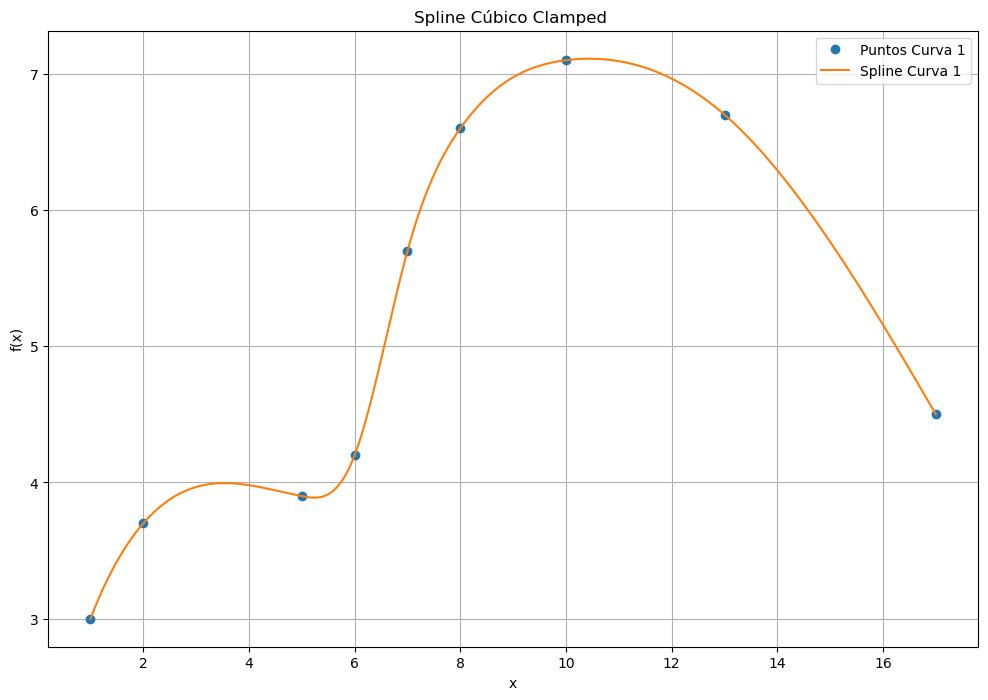

In [22]:

import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines
def evaluate_spline(splines, xs, x_vals):
    x = sym.Symbol("x")
    y_vals = []
    for x_val in x_vals:
        for i in range(len(xs) - 1):
            if xs[i] <= x_val <= xs[i + 1]:
                y_vals.append(splines[i].subs(x, x_val))
                break
    return y_vals
# Datos de la tabla
curvas = {
    "Curva 1": {
        "xs": [1, 2, 5, 6, 7, 8, 10, 13, 17],
        "ys": [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5],
        "d0": 1.0,
        "dn": -0.67
    }
}

# Graficar las curvas y sus splines cúbicos
plt.figure(figsize=(12, 8))

for curva, datos in curvas.items():
    xs = datos["xs"]
    ys = datos["ys"]
    d0 = datos["d0"]
    dn = datos["dn"]

    splines = cubic_spline_clamped(xs, ys, d0, dn)

    x_vals = np.linspace(xs[0], xs[-1], 1000)
    y_vals = evaluate_spline(splines, xs, x_vals)

    plt.plot(xs, ys, 'o', label=f'Puntos {curva}')
    plt.plot(x_vals, y_vals, label=f'Spline {curva}')

plt.title("Spline Cúbico Clamped ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

5 5.2 -0.4011781849199465 0.1258152222202451 -2.568002126658778
4 5.8 0.1539868142803838 -0.4033977218204103 0.08820215734010924
3 5.6 -0.11137135038117751 0.6687558864819717 -0.35738453610079396
2 6.1 -0.6085014127556733 -0.17162582410747595 0.2801272368631492
1 7.0 -0.19787464681108174 0.03475023545927881 -0.022930673285194974
0 4.5 3.0 -1.1007084510629728 0.12616207628025017


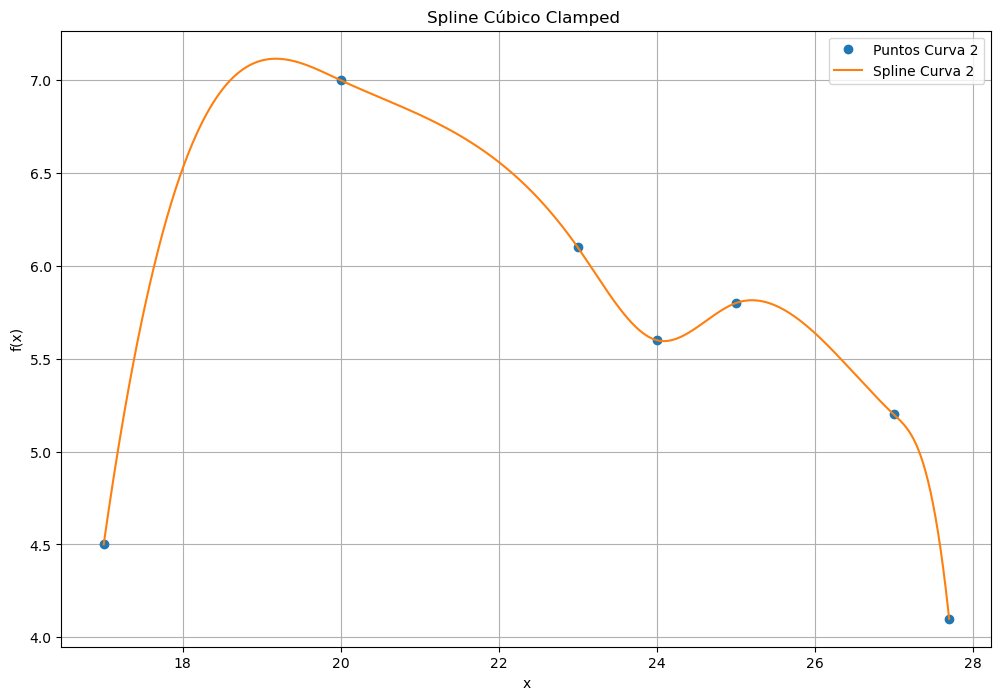

In [23]:
curvas = {
        "Curva 2": {
        "xs": [17, 20, 23, 24, 25, 27, 27.7],
        "ys": [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1],
        "d0": 3.0,
        "dn": -4.0
    },
    
}
plt.figure(figsize=(12, 8))

for curva, datos in curvas.items():
    xs = datos["xs"]
    ys = datos["ys"]
    d0 = datos["d0"]
    dn = datos["dn"]

    splines = cubic_spline_clamped(xs, ys, d0, dn)

    x_vals = np.linspace(xs[0], xs[-1], 1000)
    y_vals = evaluate_spline(splines, xs, x_vals)

    plt.plot(xs, ys, 'o', label=f'Puntos {curva}')
    plt.plot(x_vals, y_vals, label=f'Spline {curva}')

plt.title("Spline Cúbico Clamped ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

2 4.1 -0.7653465346534649 -0.26930693069306927 -0.06534653465346556
1 4.3 0.6613861386138599 -1.1574257425742556 0.2960396039603954
0 4.1 0.3299999999999999 2.2620462046204524 -3.799413274660778


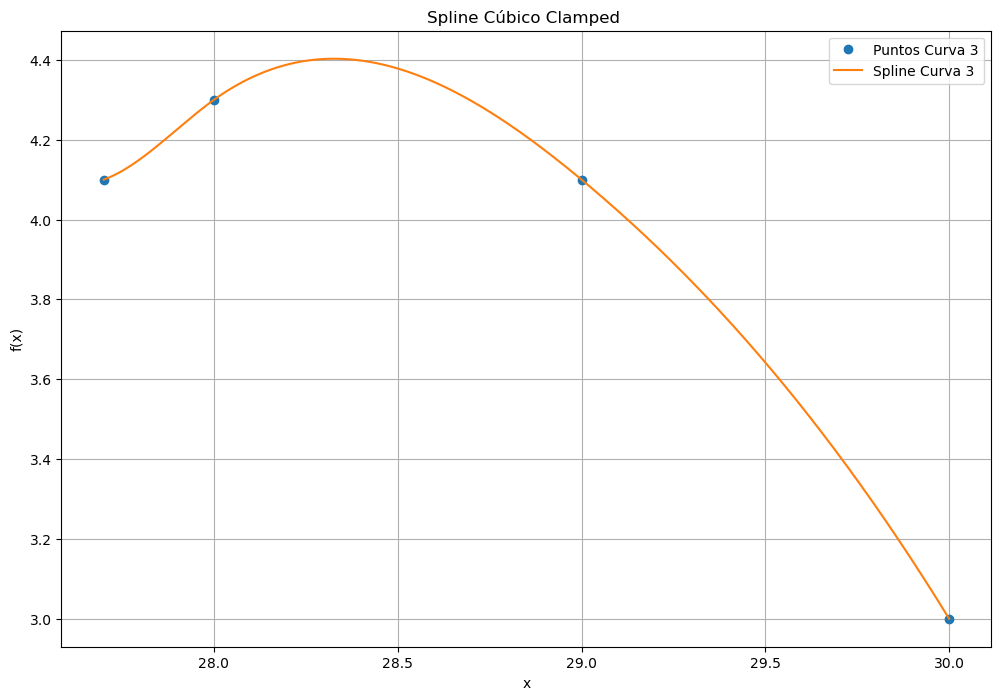

In [24]:
curvas = {
    "Curva 3": {
        "xs": [27.7, 28, 29, 30],
        "ys": [4.1, 4.3, 4.1, 3.0],
        "d0": 0.33,
        "dn": -1.5
    }  
}
plt.figure(figsize=(12, 8))

for curva, datos in curvas.items():
    xs = datos["xs"]
    ys = datos["ys"]
    d0 = datos["d0"]
    dn = datos["dn"]

    splines = cubic_spline_clamped(xs, ys, d0, dn)

    x_vals = np.linspace(xs[0], xs[-1], 1000)
    y_vals = evaluate_spline(splines, xs, x_vals)

    plt.plot(xs, ys, 'o', label=f'Puntos {curva}')
    plt.plot(x_vals, y_vals, label=f'Spline {curva}')

plt.title("Spline Cúbico Clamped ")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Link repositorio GitHub: https://github.com/armando-2002/Metodos_Numericos.git